In [ ]:
# performing linear algebra
import numpy as np

# data processing
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier # KNN model will train and be used to make predictions

In [ ]:
# uploading the data set
df = pd.read_csv("data.csv")

print (df.head)


<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [ ]:
df.info()
# will print a summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.drop(['Unnamed: 32', 'id'], axis = 1)
print(df.shape)
# dropping irrelevant columns and then returning the size of the dataframe

(569, 33)


In [ ]:
def diagnosis_value(diagnosis): # defining a function
    if diagnosis == 'M': # checks and returns if the cell is malignant or not and converts it into a numeric value
        return 1
    else:
        return 0

df['diagnosis'] = df['diagnosis'].apply(diagnosis_value) # this applies the function to the whole column

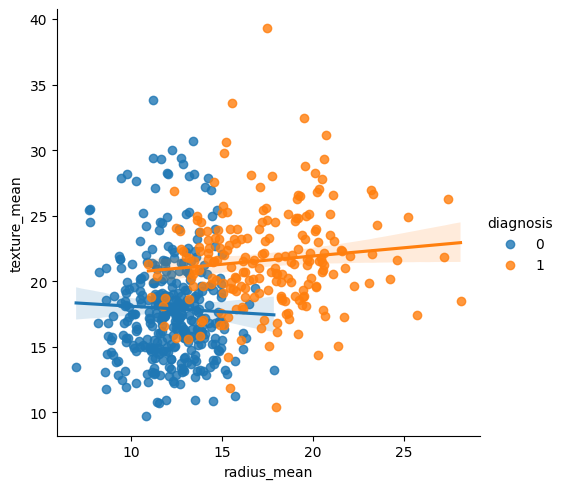

In [ ]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df) # shows the relationship between texture and radius and the amount of cellsthat are malignant or benign

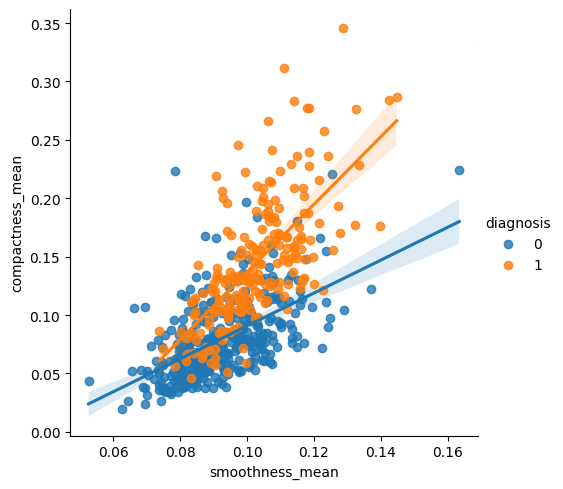

In [ ]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean',
           data = df, hue = 'diagnosis') # shows the relationship between smoothness and compactness and how many cells are malignant or benign

In [ ]:
X = np.array(df.iloc[:, 1:]) # all rows included and all columns beginning from index 1 to the end
y = np.array(df['diagnosis']) # np converts into a numpy array which is what scikit expects

In [ ]:
from sklearn.model_selection import train_test_split #train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [ ]:
print(np.isnan(X_train).sum()) # printing the number of empty X values


381


In [ ]:
# handling the missing X values
from sklearn.impute import SimpleImputer # importing imputer, this will give us the simpleImputer class which will fill all the missing values

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train) # fit the imputer on the missing data and transforming it
X_test = imputer.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [31]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=49)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
knn.score(X_test, y_test)

0.9627659574468085

In [ ]:
# cross validation
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  13 


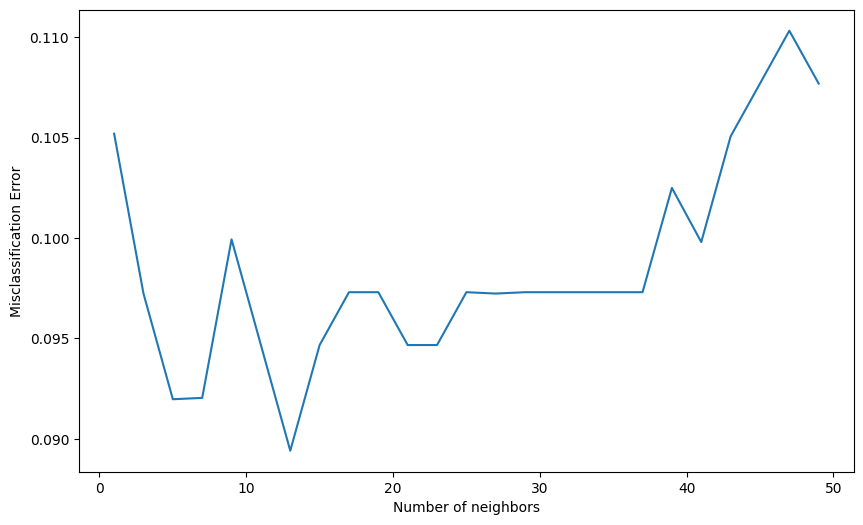

In [ ]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()